__Statistical Learning in High Dimension__
<br>_Professor: M. Hebiri_
<br>_Students: M. Berezov, V. Oliinyk_
### TP3. Sparsity, estimation and selection of variables
In this practical session we are studying thresholding as a technique alowing to carry out variables selection. 

We consider three different thresholding rules and compare their properties. Next, we use thresholding to detect breakpoints in data. Finally, we apply the discussed theory to historical crude oil prices data.

#### Exercise 1. Different thresholding methods
1.1 _Thresholding functions_

We observe $y_1, ..., y_d$ verifying Gaussian sequence model, $y_j = a\eta_j+\xi_j; j=1,...,d$
with $a \in \mathbb{R}$, and  the unknown parameters $\eta_j\in\{0,1\}$ such that only $[d^{1-\beta}]$ of them are non-zero, $\xi_j \sim N(0,1)$, i.i.d.

We consider $d=50, \beta=0.3$ and $a\in [1, 10]$. Threshold is set to $\tau = \sqrt{2log(d)}$. 

Our goal is to estimate the unknown parameter $\theta^*=a\cdot (\eta_1,...,\eta_d)^T$ using three different thresholding estimators:
1. __Hard thresholding__: $\hat{\theta}_j^H =y_j I(| y_j |>\tau)$
2. __Soft thresholding__: $\hat{\theta}_j^S =y_j\cdot\Big(1 - \frac{\tau}{| y_j |}\Big)_+$
3. __Non-negative 'garrote' thresholding__: $\hat{\theta}_j^{NG} =y_j\cdot\Big(1 - \frac{\tau^2}{y^2_j}\Big)_+$


Let us look at these thresholding functions plotting them as functions of $y_j$ on the same graph.

_Remark:_ Here, we only want to discover how thresholding functions behave as the argument $y_j$ varies, so we take the grid on $y_j$ and compute thresholding estimators on this grid

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
d = 50
b = 0.3
t = np.sqrt(2*math.log(d))
def th(y, type='h'):
    return {
    'h': y*(abs(y)>t),
    's': y*max(0,(1-t/abs(y))),
    'ng': y*max(0,(1-(t/abs(y))**2))
    }[type]
th = np.vectorize(th)

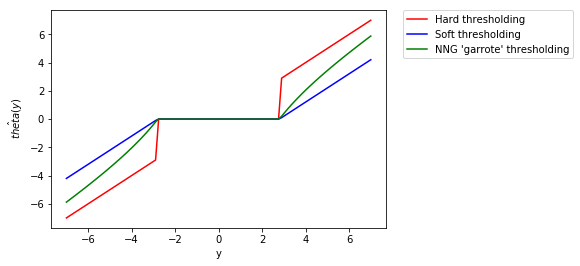

Threshold is set to: 2.79714962254


In [3]:
y_grid = np.linspace(-7,7,100)
thetas = [np.linspace(0,100,100)]*3
list_of_types = ['h','s','ng']
for i, val in enumerate(list_of_types):
    thetas[i] = th(y_grid,val)
line1, = plt.plot(y_grid, thetas[0], '-r',label="Hard thresholding")
line2, = plt.plot(y_grid, thetas[1], '-b',label="Soft thresholding")
line3, = plt.plot(y_grid, thetas[2], '-g',label="NNG 'garrote' thresholding")
plt.xlabel("y")
plt.ylabel("$\hat{\ theta}(y)$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print("Threshold is set to: "+str(t))

Hard thresholding simply 'keeps' or 'kills' the data $y$ according as it lies outside or inside the threshold zone $[-\tau, \tau]$. Soft thresholding also 'kills' the data outside $[-\tau, \tau]$ but shrinks retained coefficients producing a continuous function of input data $y$. Finally, non-negative 'garrote' thresholding is almost the same as the soft one, but it tries to 'compensate' the shrinkage of the retained coefficients.

1.2 _Quadratic risk_

Now, let's study the quadratic risk of thresholding estimators, $R(\hat{\theta},a) = \| {\hat{\theta}-\theta^*}\|^2_2$.
To avoid misinterpretation of the true risk due to the randomness of estimators, we iterate thresholding estimation 100 times and take the mean of calculated risk.

In [4]:
boundary = int(d**(1-b))
n_zeros = np.zeros(d-boundary)
n_ones = np.ones(boundary)
n = np.concatenate([n_zeros,n_ones])
np.random.shuffle(n)

In [5]:
def calculate_y(a):
    ksi = np.random.normal(0, 1, d)
    return a*n + ksi
calculate_y=np.vectorize(calculate_y)

In [6]:
def risk_quadr(a,type):
    y = calculate_y(a)
    return np.sum((th(y,type) - a*n)**2)
risk_quadr = np.vectorize(risk_quadr)

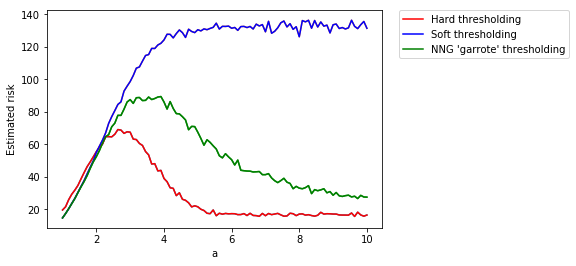

In [7]:
a = np.linspace(1,10,100)
r = [np.linspace(0,100,100)]*3

for i, val in enumerate(list_of_types):
    r[i] = np.mean(np.array([risk_quadr(a,val) for j in np.arange(100)]),axis=0)
    plt.plot (a, r[i])
    
line1, = plt.plot(a, r[0], '-r',label="Hard thresholding")
line2, = plt.plot(a, r[1], '-b',label="Soft thresholding")
line3, = plt.plot(a, r[2], '-g',label="NNG 'garrote' thresholding")
plt.xlabel("a")
plt.ylabel("Estimated risk")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As we see from the plot of the quadratic risk for different thresholding estimators, they bevahe differently as $a$ varies.

First, hard thresholding leads to the lowest quadratic risk, whereas soft thresholding leads to the highest one.
Second, as $a$ grows, risk of soft thresholding increases. That is intuitive since soft thresholding shrinks the retained coefficients.
We see that non-negative 'garrote' thresholding which compensates this shrinkage does the job pretty well, and its risk doesn't explode as $a$ rises.

To conclude, it is reasonable to use hard or NNG 'garrote' thresholding when $a$ is high ($a>4$) and avoid to use the soft one. When the values of $a$ are low $a<3$, the risk of three estimators is almost the same, so the choice of the estimator doesn't make much difference. 

1.3 _Risk of variables selection_

We select the non-zero coordinates of the vector $\theta^*$ using the hard thresholding and study the risk of variables selection for different values of a:
    $$
        R^{MS} (
            \widehat{
                \theta
            }, a
        ) = \sum\limits_{
            \substack{
                j=1
            }
        }^{
            M
        } |\eta_j - \widehat{
            \eta
        }_j| \qquad with \quad \widehat{
            \eta
        }_j = \mathbb{
            1
        } (|y_i| \geq \tau)
    $$
</p>

Again, to diminish the role of randomness, we take the mean of risk calculated thorough 100 estimations

In [8]:
def calculate_n_chap(a):
    return (np.abs(calculate_y(a)) >= t)*1
    
def risk_ms(a):
    return np.sum(np.abs(calculate_n_chap(a) - n))
    
calculate_n_chap = np.vectorize(calculate_n_chap)
risk_ms = np.vectorize(risk_ms)

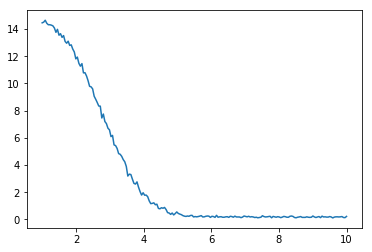

In [9]:
a = np.linspace(1,10,200)
rms_mean = np.mean(np.array([risk_ms(a) for j in np.arange(100)]),axis=0)
plt.plot (a, rms_mean)
plt.show ()

We notice that the estimated risk of variables selection is a decreasing function of $a$. We also see that when $a>4.5$ this risk vanishes. 

#### Exercise 2. Detection of breakpoints
We observe $y_j$ verifying Gaussian sequence model, $y_j = \theta^*_j + \epsilon · \xi_j; \qquad j = 1, ..., d$ with $\epsilon = 1/\sqrt{d}$ and 
$$\theta^*=
        \left\{
            \begin{array} {ll}
                \theta^*_j = 3, \quad j \in \left\{
                    1, ..., 10
                \right\}\\
                \theta^*_j = 7, \quad j \in \left\{
                    11, ..., 30
                \right\}\\
                \theta^*_j = 1,5, \quad j \in \left\{
                    31, ..., 40
                \right\}\\
                \theta^*_j = 2, \quad j \in \left\{
                    41, ..., d
                \right\}\\
            \end {array}
        \right.
    $$
Again, $\xi_j$ are i.i.d. standard normal and $d=50$.

We want to detect breakpoints in the vector $\theta^*$, i.e. coordinates $j\in \{2,...,d\}$ such that $\theta_j^*\neq \theta_{j-1}^*$. In other words, our goal is to detect the "jumps" in the coordinates of the vector $\theta^*$ observing its noisy version.

To do that, we consider the sparse vector of differences, $\Delta^*=(\Delta_1^* ,...,\Delta_{d-1}^*)^T$, $\Delta_j^*=\theta_{j+1}^*-\theta_{j}^*$.

As we observe the noisy version of $\Delta^*$, namely $y_{j+1}-y_j$, we select non-zero coordinates of $\Delta^*$ using discussed thresholding rule: $1(|y_{j+1}-y_j|\geq \epsilon\tau)$. So, when we observe high jumps in $|y_{j+1}-y_j|$, we assume that there is a breakpoint at $j+1$. 

Hence, we estimate the set $J^*$ in the following way: 
$\hat{J} = \{j\in \{2,...,d\}: 1(|y_{j}-y_{j-1}|\geq \epsilon\tau)\}$

_Remark:_ As in our current model factor $\epsilon$ appeared, we should multiply $\tau$ by $\epsilon$ to set the appropriate threshold.

In [10]:
theta1 = 3*np.ones(10)
theta2 = 7*np.ones(20)
theta3 = 1.5*np.ones(10)
theta4 = 2*np.ones(10)
theta = np.concatenate([theta1,theta2,theta3,theta4])

In [11]:
def calc_y ():
    ksi = np.random.normal(0, 1, d)
    return theta + ksi/np.sqrt(d)
calc_y = np.vectorize(calc_y)

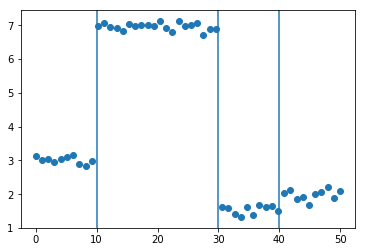

Estimated set of breakpoints: [11 31 41]


In [18]:
sparse_emp = np.zeros(d-1)
y = calc_y()
for i in range(d-1):
    sparse_emp[i] = y[i+1] - y[i]
coords = (abs (sparse_emp) >= t/np.sqrt(d)) * 1 # Select non-zero coordinates by hard thresholding
J = np.where(coords != 0)[0] # Estimated set of breakpoints
x_grid = np.linspace(0,50,50)
plt.scatter (x_grid, y)
for val in J :
    plt.axvline(val+1) # Plot vertical lines at breakpoints
plt.show ()
print("Estimated set of breakpoints: "+str(J+2))

As we see, selection of non-zero coordinates in the vector of observed differences gives good results.
In our example, $J^*={11, 31, 41}$, and we successfully selected all of breakpoints.

#### Exercise 3. Real data for breakpoints detection
Now, we exploit the methodology suggested above to detect breakpoints in the real-world 
data. We have chosen data that represent historical crude oil prices from 1861 to present. 
<br/>You can find data at https://github.com/maxberezov/Statistics/blob/master/123.txt. <br/> We are examining 153 observation (one observation for each year) Thus, in our dataset X-axis shows consequtive years from 1861 till 2013 and Y-axis shows oil prices in the current US dollars per barrel.

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('123.txt',sep='\t')
x_grid = np.linspace(0,len(data)-1,len(data))
y = data['3'] # 

In [21]:
y[:10] #Show first ten prices

0     12.65
1     24.40
2     59.36
3    119.56
4     99.88
5     59.26
6     40.01
7     63.27
8     63.45
9     70.82
Name: 3, dtype: float64

As we can see from the graph, there is a big shock in price beetween 0 and 10 year and the subsequent fall. Then from 20 till 110 year price behaves relatively constant. After we can observe jump, fall and jump again.

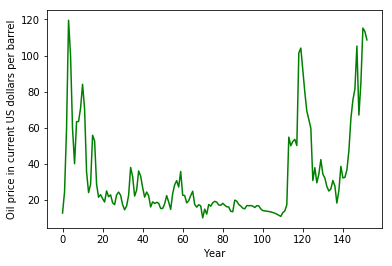

In [22]:
line = plt.plot(x_grid,y, '-g',ms=0.1)
plt.xlabel("Year")
plt.ylabel("Oil price in current US dollars per barrel")
plt.show()

Let's apply the methodology described in the previous paragraph to detect the breakpoints.

In [23]:
d = len(y)
threshold = 35

In [24]:
sparse = np.zeros(d-1)
sparse_est = np.zeros(d-1)

def calculate_sparse(threshold):
    for i in range(1,d-1):
        sparse[i] = float(y[i+1])- float(y[i])
    sparse_est = (abs (sparse) >= threshold) * 1
    return sparse_est

def plot(threshold):
    print('Threshold = ' + str(threshold))
    J = np.where(calculate_sparse(threshold) != 0)[0]
    plt.plot(x_grid,y,'o', color = 'green',ms=2)
    plt.xlabel("Year")
    plt.ylabel("Oil price in US dollars per barrel")
    for val in J :
        plt.axvline(val)
    plt.show ()

Threshold = 30


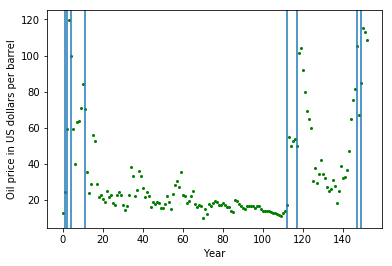

Threshold = 35


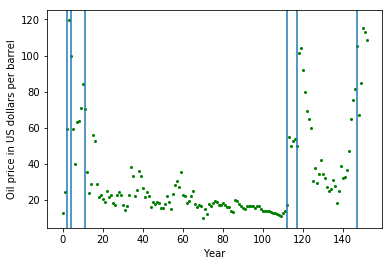

Threshold = 50


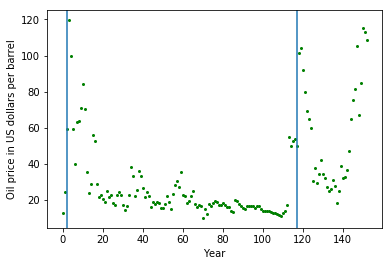

In [25]:
threshold = 30
plot(threshold)
threshold = 35
plot(threshold)
threshold = 50
plot(threshold)

#### Conclusion <br/>
1) The suggested method for detection of breakpoints is suitable for the chosen data because the latter has significant jumps <br/>
2) Obviously, this approach is not suitable to detect the continuous but steap increase of function<br/>
3) This method, in general, correctly detects the considerable shocks in the oil price data<br/>
4) An increase in the threshold value leads to a decrease in the number of jumps detected and vice versa. 